## Loading and Navigating the dataset

In [1]:
# Importing all necessary python libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Creating directory for saving figures
os.makedirs('figures', exist_ok = True)

In [3]:
# loading and reading the dataset
soil_crops = pd.read_csv('soil_measures.csv')
soil_crops.head(10)

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
5,69,37,42,7.073454,rice
6,69,55,38,5.700806,rice
7,94,53,40,5.718627,rice
8,89,54,38,6.685346,rice
9,68,58,38,6.336254,rice


In [4]:
# shape of the dataset
soil_crops.shape

(2200, 5)

In [5]:
# Dataset Information and Summary Statistics
soil_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [6]:
# Summary statistics
soil_crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [7]:
# Checking missing values
soil_crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [8]:
# Total number of crops
soil_crops['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

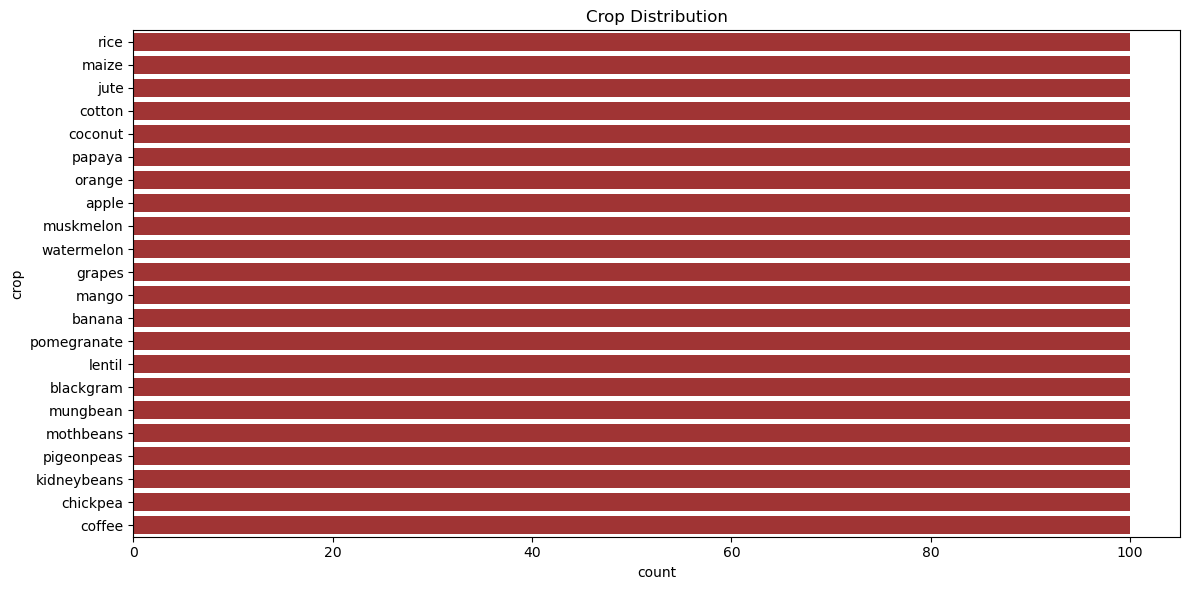

In [9]:
# Class Distribution
plt.figure(figsize=(12,6))
sns.countplot(y ='crop', data = soil_crops, order = soil_crops['crop'].value_counts().index, color = 'firebrick' )
plt.title('Crop Distribution')
plt.tight_layout()
plt.savefig('figures/crop_disribution.png', dpi = 300, bbox_inches = 'tight')

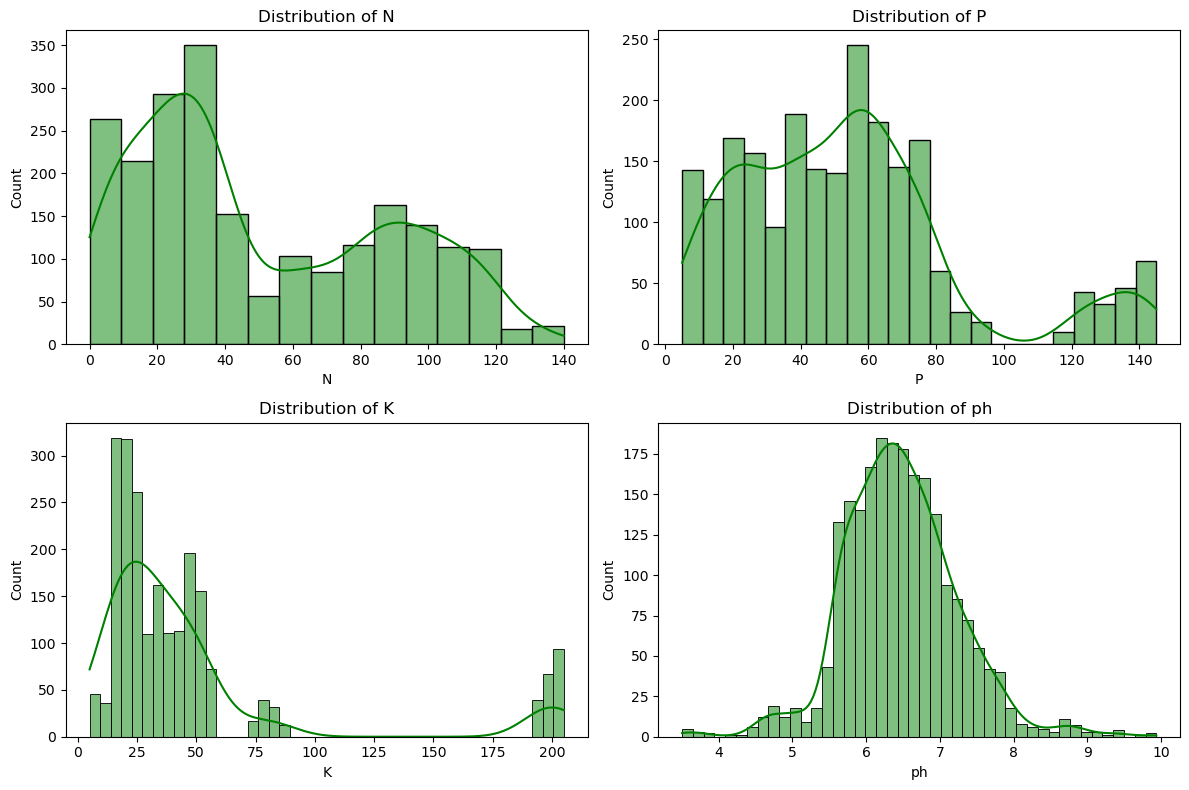

In [12]:
# Feature Distribution Plots
plt.figure(figsize = (12,8))
for i, col in enumerate(['N', 'P', 'K', 'ph']):
    plt.subplot(2,2,i+1)
    sns.histplot(soil_crops[col], kde = True, color = 'green')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('figures/feature_distribution.png', dpi = 300, bbox_inches = 'tight')

## Model Traing with Evaluation

Model Accuracy: 0.62


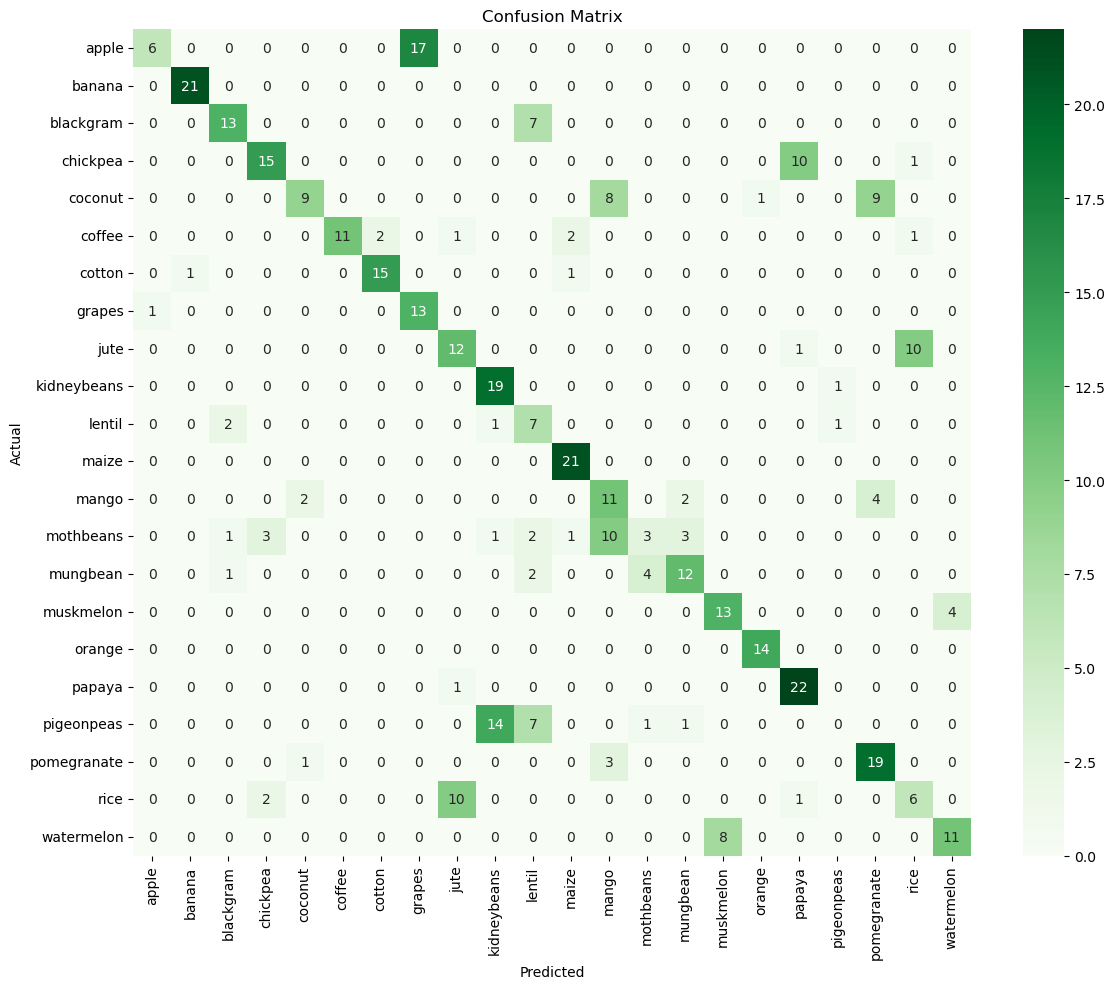

In [15]:
# Standardizing features and split data
scaler = StandardScaler()
X = soil_crops.drop('crop', axis = 1)
X_scaled = scaler.fit_transform(X)
y = soil_crops['crop']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Training Logistic Regression Model
logreg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', max_iter = 1000, random_state = 42)
logreg.fit(X_train, y_train)

# making predictions and Evaluating
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Saving classification report to text file
report = classification_report(y_test, y_pred)
with open('figures/classification_report.txt', 'w') as f:
    f.write(report)

# Confusion Matrix Plot
plt.figure(figsize = (12, 10))
sns.heatmap(pd.crosstab(y_test, y_pred,
                        rownames = ['Actual'],
                        colnames = ['Predicted']), cmap = 'Greens', annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('figures/confusion_matrix.png', dpi = 300, bbox_inches = 'tight')

## Model Interpretation

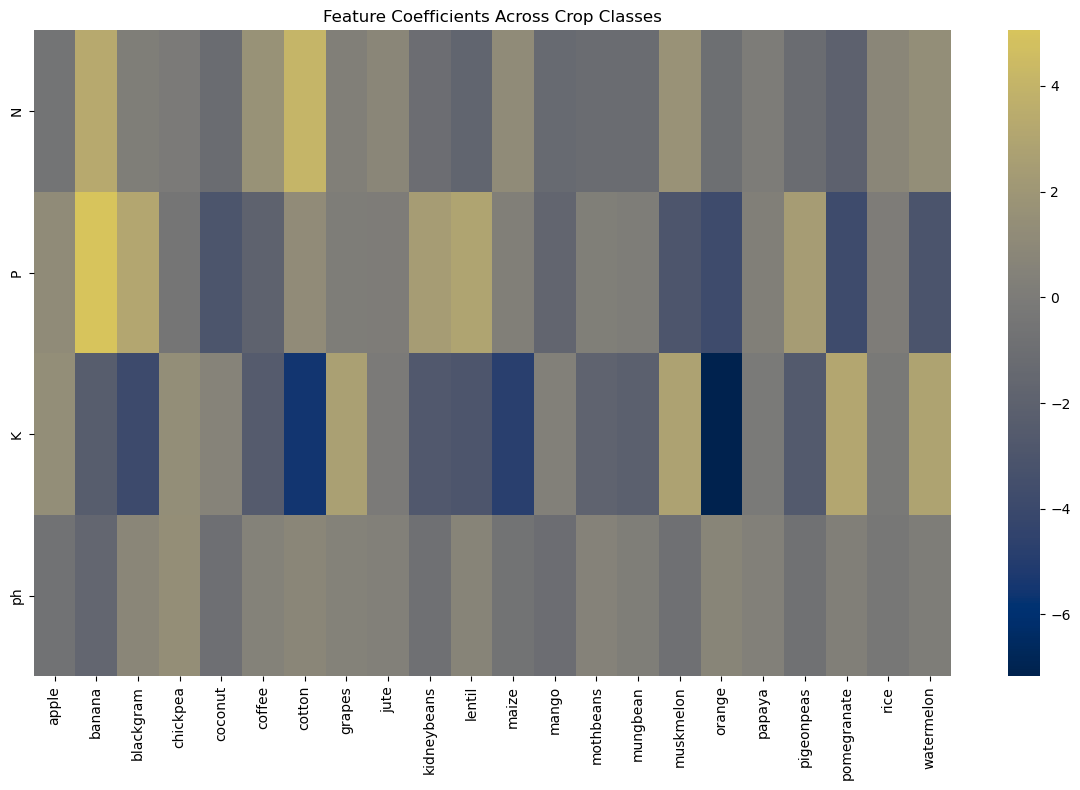

In [18]:
# Feature Coefficients heatmap
coefficients = logreg.coef_
classes = logreg.classes_
coef_df = pd.DataFrame(coefficients, columns = X.columns, index = classes).T

plt.figure(figsize = (12, 8))
sns.heatmap(coef_df, cmap = 'cividis', center = 0)
plt.title('Feature Coefficients Across Crop Classes')
plt.tight_layout()
plt.savefig('figures/feature_coefficients.png', dpi = 300, bbox_inches = 'tight')

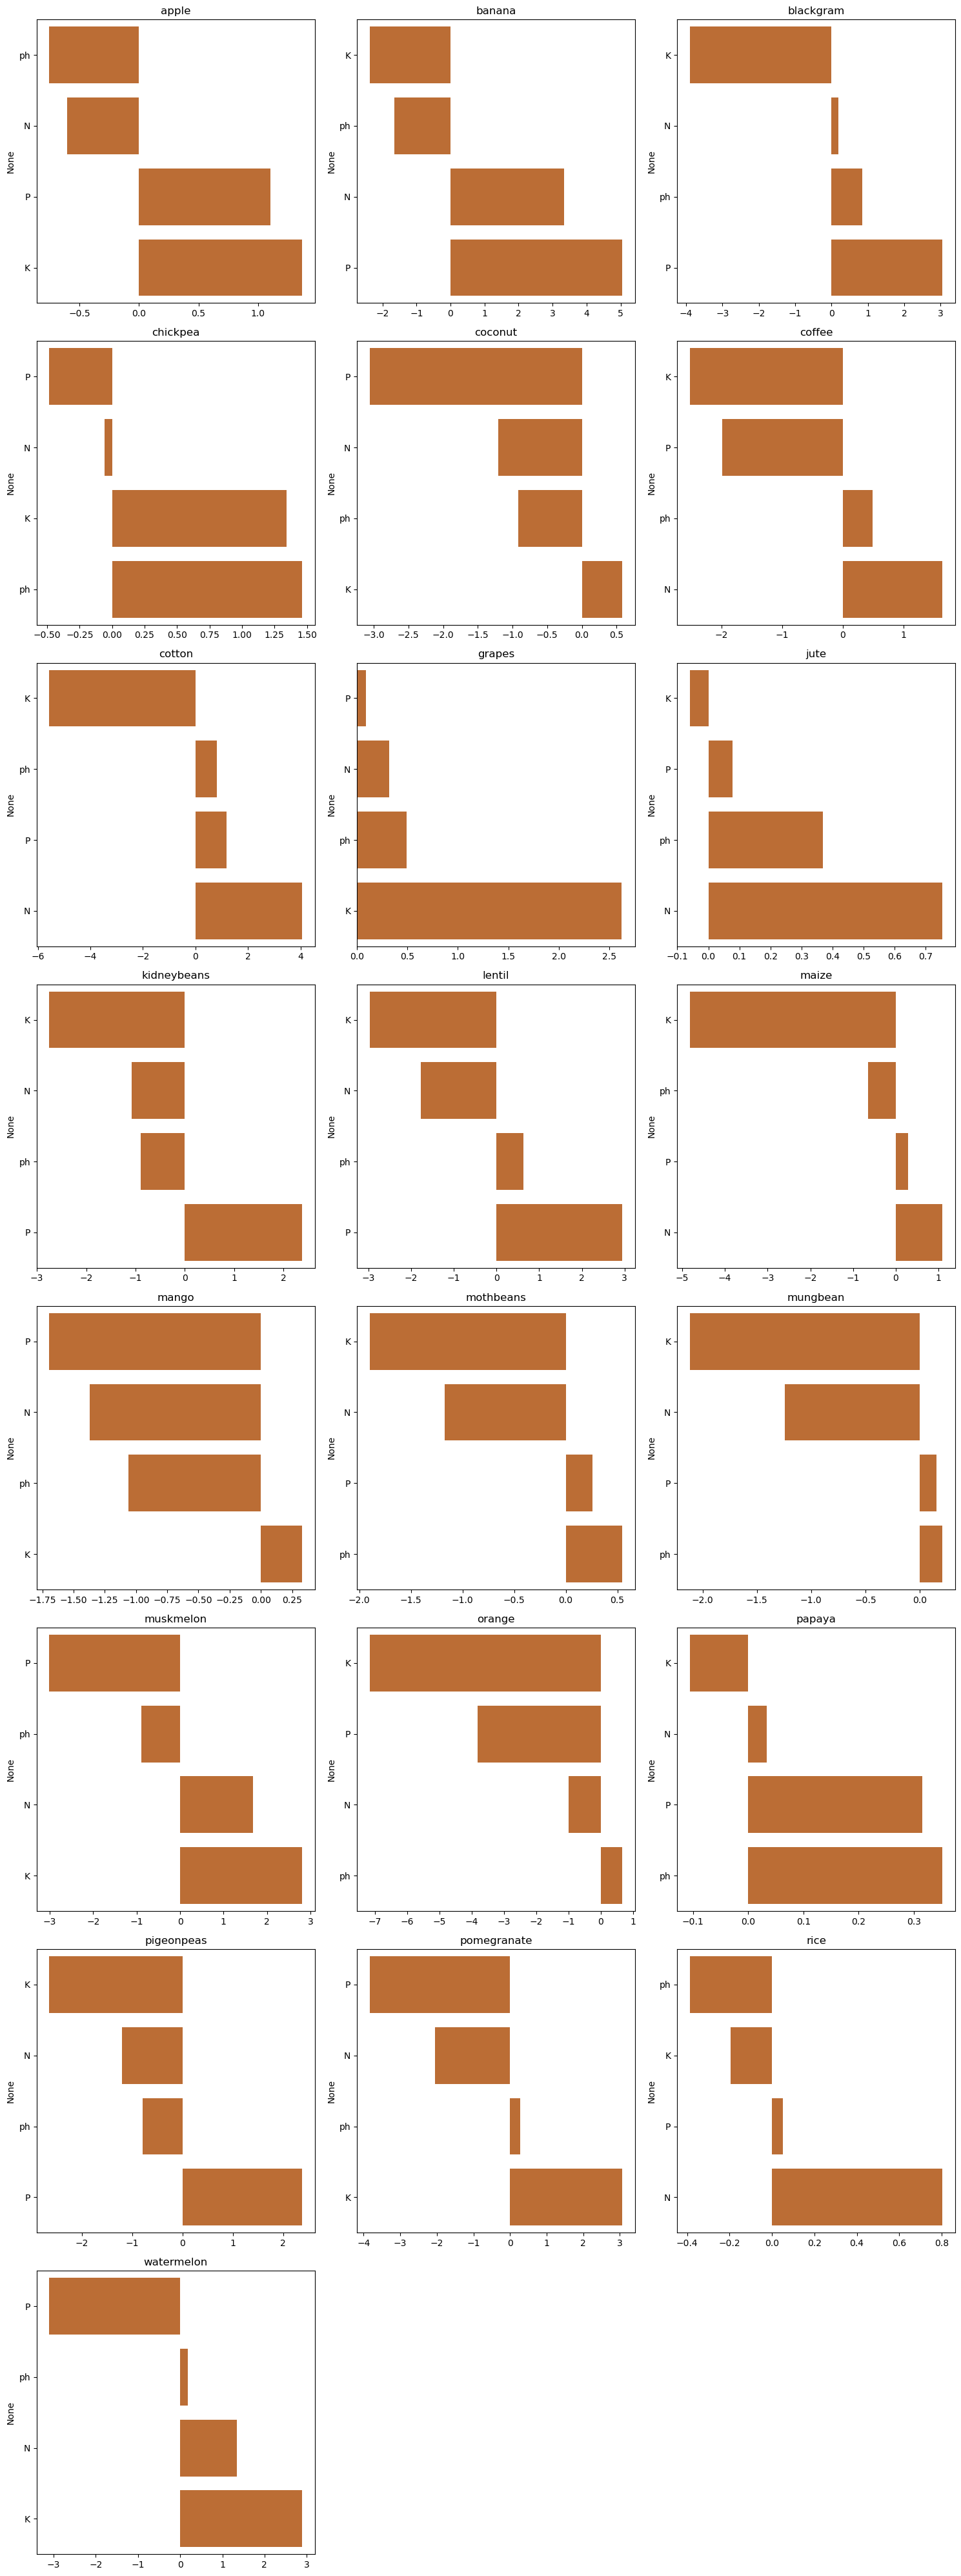

In [20]:
# The number of unique crops
num_crops = len(classes)

# Calculating the appropriate grid size (rows x columns )
n_cols = 3
n_rows = (num_crops + n_cols-1) // n_cols # round up division


# Top Coefficients for Each Crop ( Alternative Visualization)
plt.figure(figsize = (15, 5*n_rows)) # Adjust height based on rows
for i, crop in enumerate(classes, 1): # Start enumeration at 1 for subplot numbering
    plt.subplot(n_rows, n_cols, i)
    crop_coef = coef_df[crop].sort_values()
    sns.barplot(x = crop_coef.values, y = crop_coef.index, color = 'chocolate')
    plt.title(f'{crop}')
    plt.tight_layout()
plt.savefig('figures/top_coefficients_by_crop.png', dpi = 300, bbox_inches = 'tight')